**Nama : Ariya wibawa pratama**</br>
**NIM  : 211351026**</br>
**Kelas: Pagi A**</br>


#Import Dataset Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ariyawibawapratama","key":"d93e7374358fa07956cc569333e9c477"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.41MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library yang dibutuhkan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Discovery


In [6]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Preparation

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mask = df['Spending Score (1-100)'] > 50
df_score = df[mask]
df_score

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
195,196,Female,35,120,79
197,198,Male,32,126,74


In [10]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA

**Histogram**

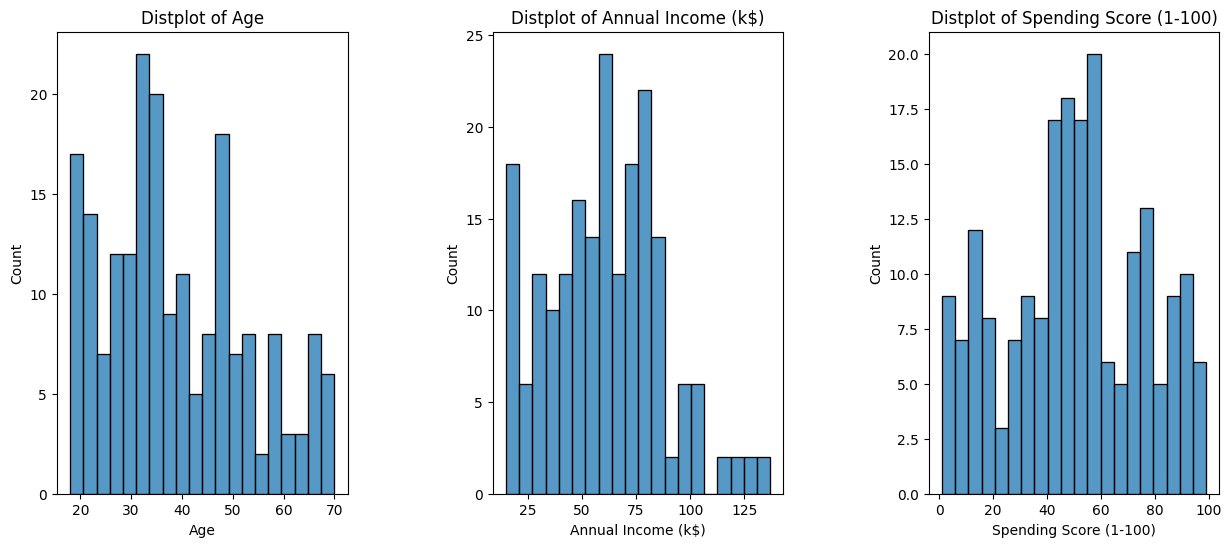

In [11]:
plt.figure(figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

fitur-fitur ini karena memiliki sedikit kemiringan cenderung terdistribusi secara normal

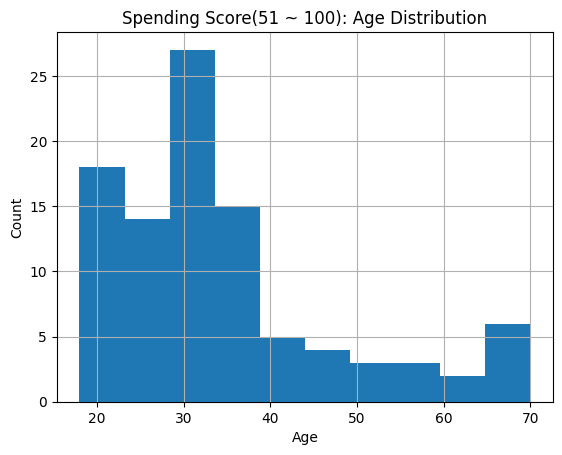

In [12]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

Histogram kami menunjukkan bahwa banyak orang yang memiliki skor pengeluaran lebih dari 50 adalah orang-orang muda.

**Hitung Plot Gender**

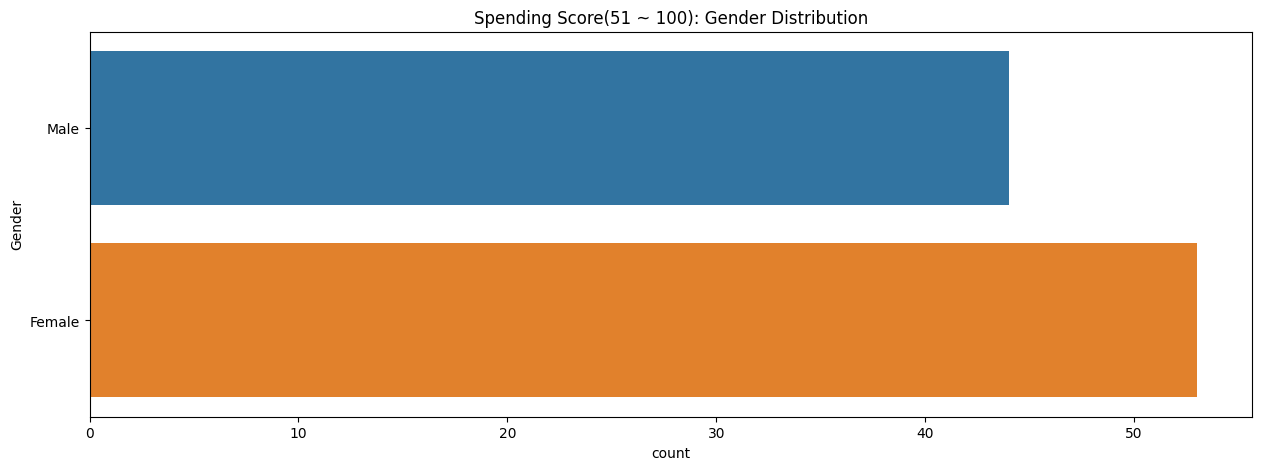

In [13]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df_score)
plt.title('Spending Score(51 ~ 100): Gender Distribution')
plt.show();

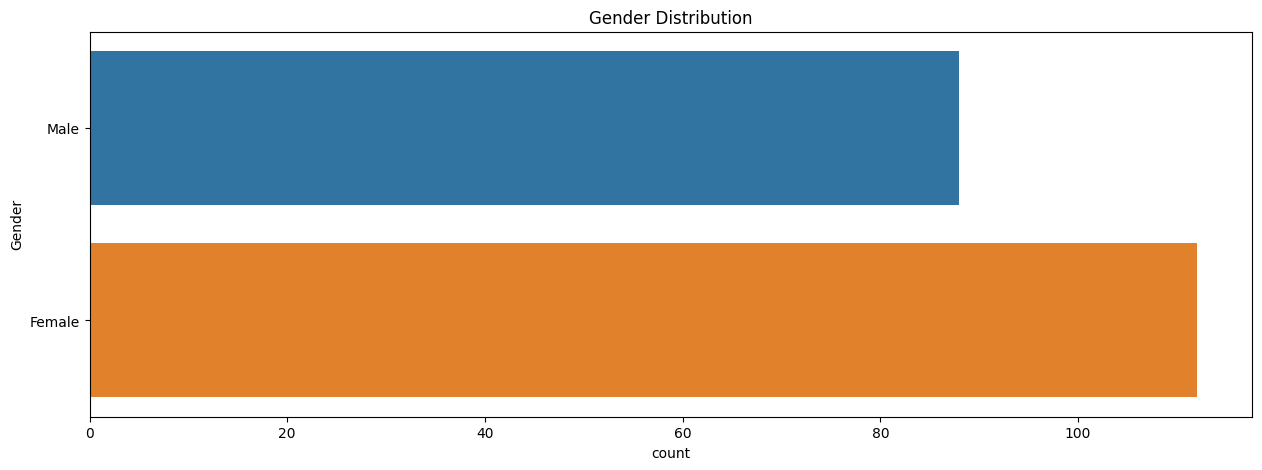

In [14]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.title('Gender Distribution')
plt.show();

**Merencanakan Hubungan antara Usia, Pendapatan Tahunan dan Skor Pengeluaran**

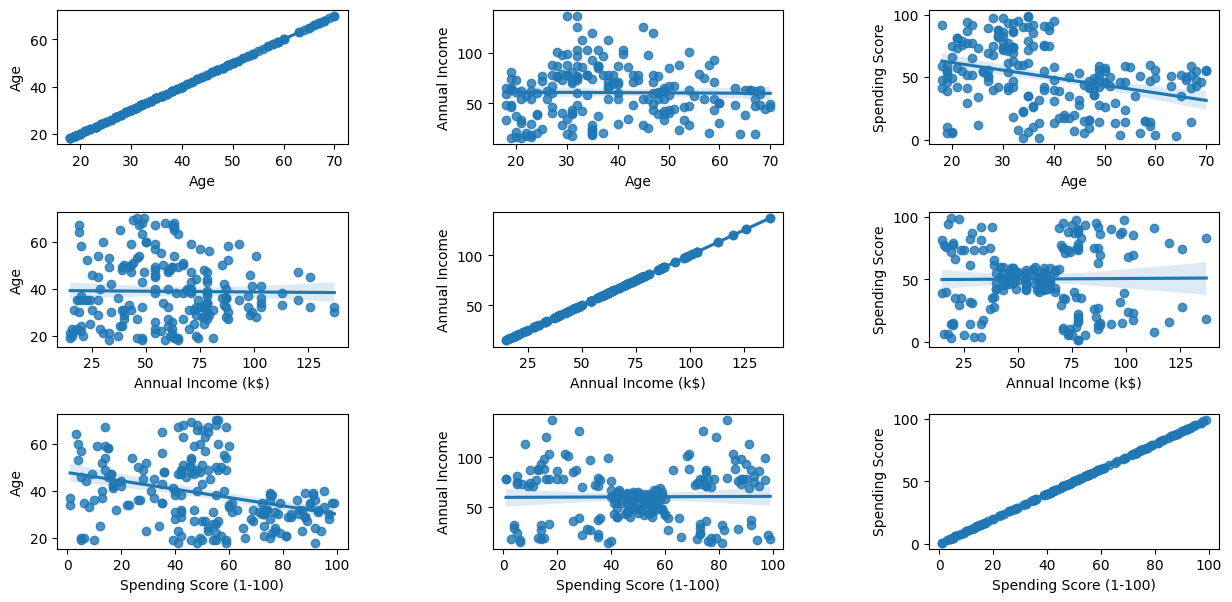

In [15]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

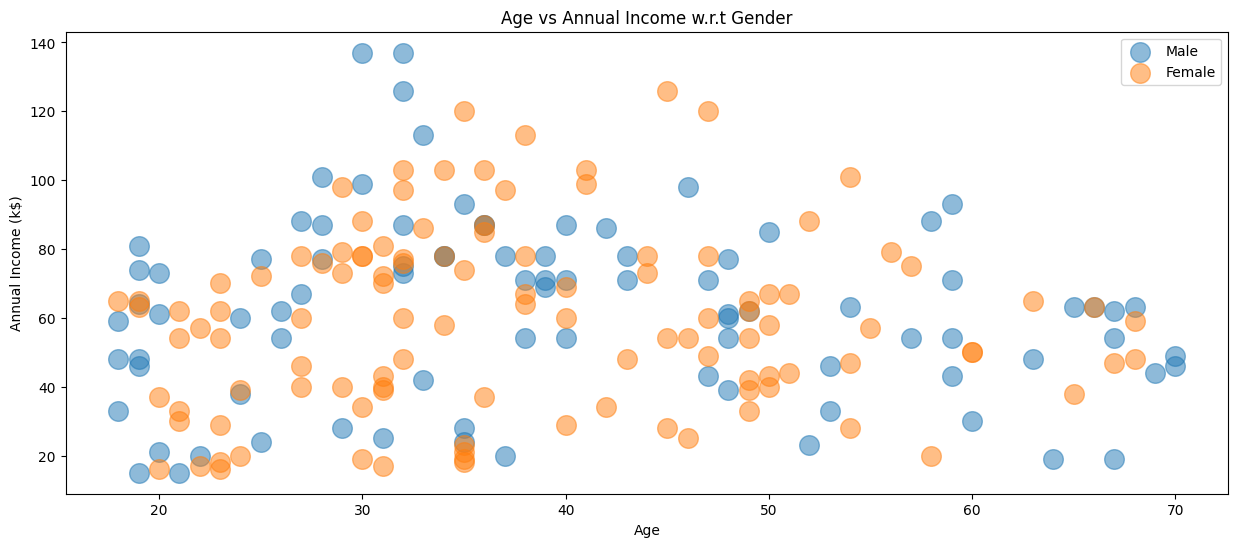

In [16]:


plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()



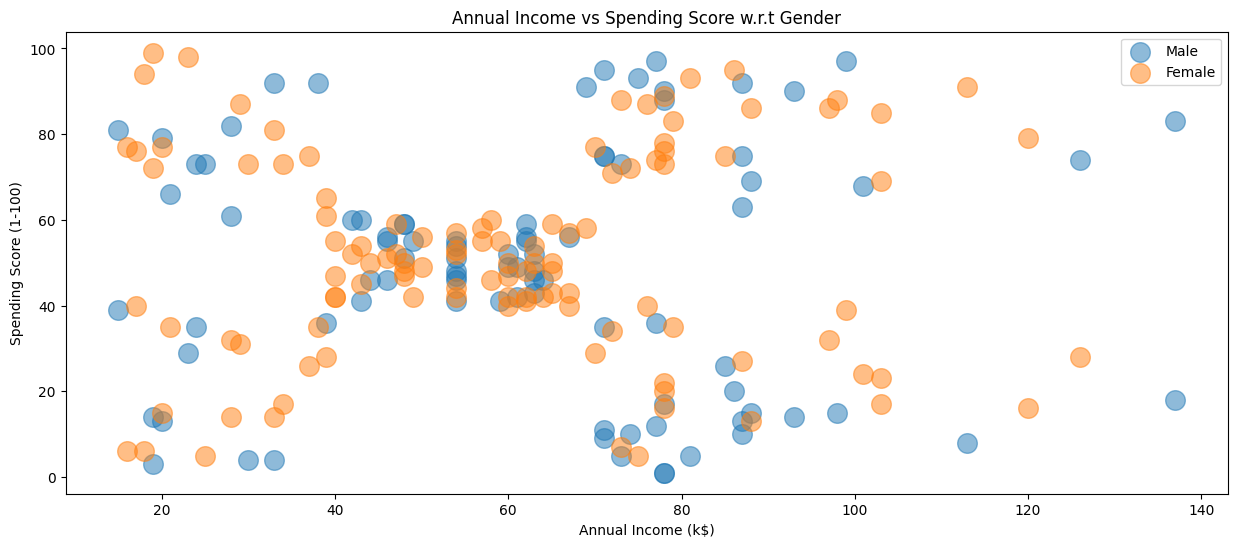

In [17]:


plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()



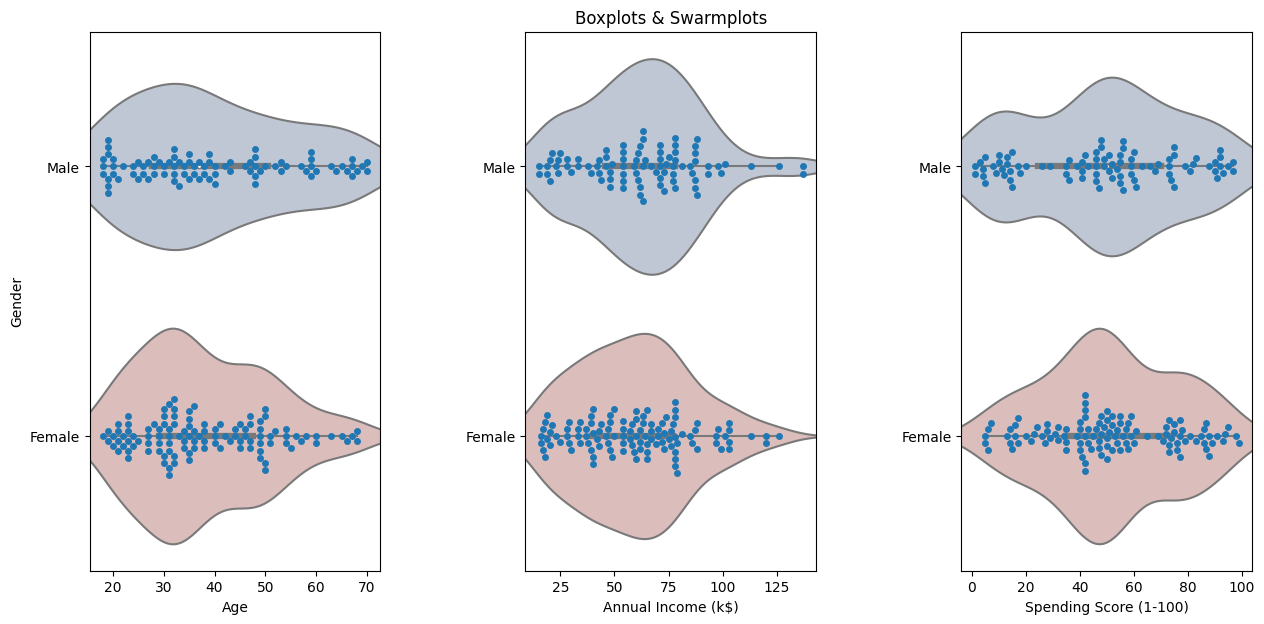

In [18]:




plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()





#Split

In [19]:
X = df.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# modeling


Clustring Using K-Means


Iterate

Gunakan perulangan for untuk membangun dan melatih model K-Means dengan n_clusters berkisar dari 2 hingga 12 (inklusif). Setiap kali model dilatih, hitung inersianya dan tambahkan ke daftar inertia_errors, lalu hitung skor siluet dan tambahkan ke daftar siluet_scores.


Segmentasi menggunakan Skor Pendapatan dan Pengeluaran Tahunan

In [20]:
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []
# Tambahkan loop `for` untuk melatih model dan menghitung inersia, skor siluet
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Inertia: [181363.59595959593, 106348.37306211122, 73679.78903948836]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:


# Buat plot garis `inertia_errors` vs `n_clusters`
fig = px.line(x= range(2 , 13) , y= inertia_errors , title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()



In [22]:
# Buat plot garis `silhouette_scores` vs `n_clusters`
fig = px.line(x= n_clusters , y= silhouette_scores , title= "K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

Jumlah cluster terbaik adalah 5

In [23]:
final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [24]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

[2 3 2 3 2]


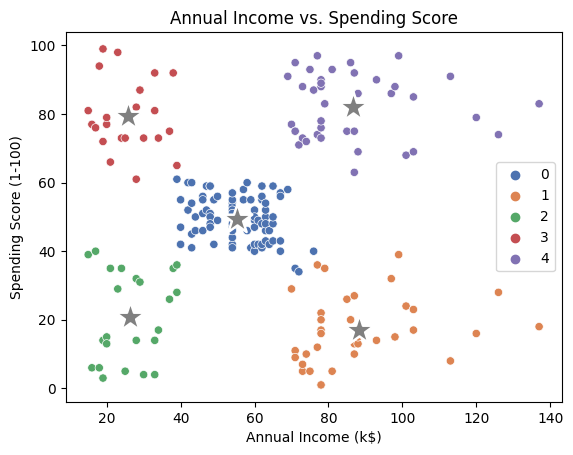

In [25]:
#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

In [26]:
# Buat diagram batang `xgb` berdampingan
xgb= X.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()



# simpan model (Pickle)

In [27]:
X.to_excel("output_cluster.xlsx")